In [ ]:
!nvidia-smi

Fri Oct 24 10:21:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## DOWNLODING REQUIRED PACKAGES

In [ ]:
!pip install  opencv-python matplotlib seaborn easyocr streamlit ultralytics  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 16.2 MB/s eta 0:00:00


## CHECKING FOR DATASET PRESENCE IN THE DRIVE

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

DATASET_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images"

if os.path.exists(DATASET_PATH):
    print(f"Dataset found at:, {DATASET_PATH}")
else:
    print("Dataset path not found. Please check the path.")


Dataset found at:, /content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images


#RANDOM IMAGES OF THE DATA SET

Total images found: 410


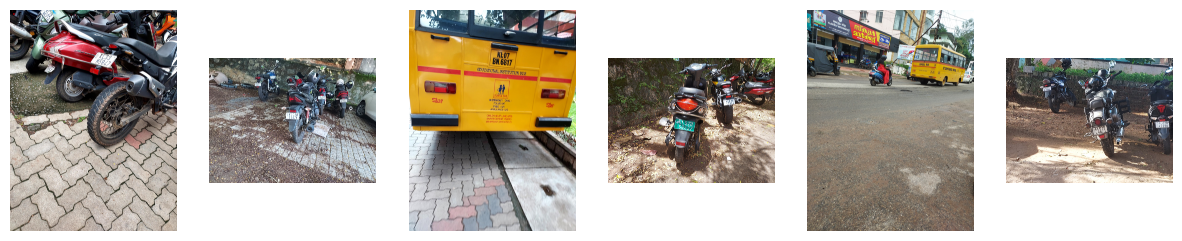

In [ ]:
import glob
import random


image_files = glob.glob(os.path.join("/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images", "*.jpg"))

print("Total images found:", len(image_files))

sample_images = random.sample(image_files, 6)

fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for idx, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(img)
    axes[idx].axis("off")
plt.show()


CHECKING ALL THE IMAGES FOR LABELS

Found 115 images with matching labels.


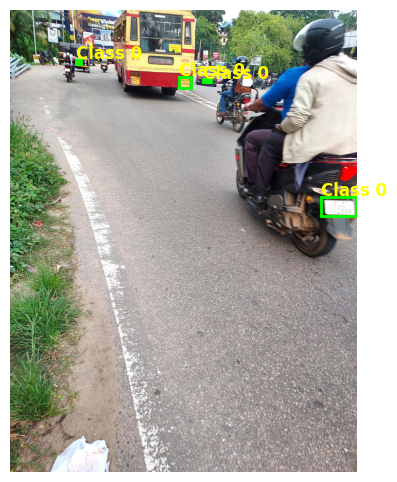

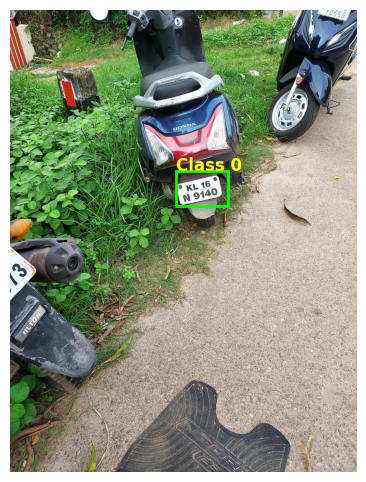

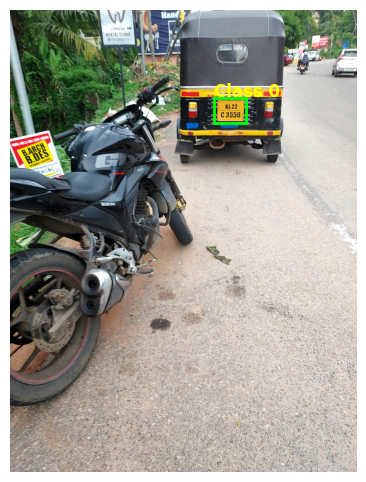

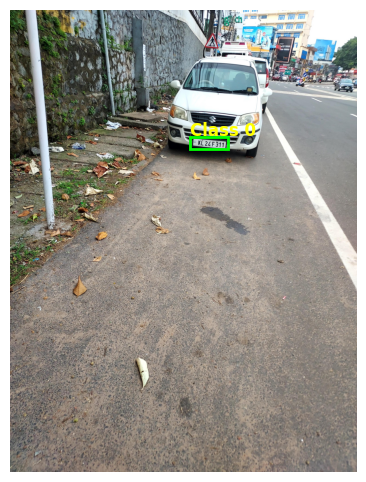

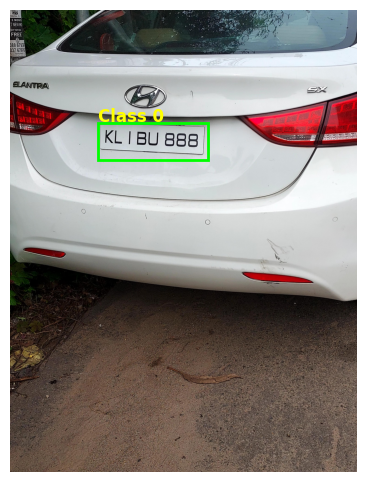

In [ ]:
import matplotlib.patches as patches
LABELS_PATH="/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"
image_files = glob.glob(os.path.join("/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images", "*.jpg"))
labeled_images = []
for img_path in image_files:
    file_name = os.path.basename(img_path).split('.')[0]
    label_path = os.path.join(LABELS_PATH, file_name + ".txt")
    if os.path.exists(label_path):
        labeled_images.append((img_path, label_path))

print(f"Found {len(labeled_images)} images with matching labels.")

sample_pairs = random.sample(labeled_images, min(5, len(labeled_images)))


for img_path, label_path in sample_pairs:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.imshow(img)

    for line in lines:
        cls, x_center, y_center, bw, bh = map(float, line.strip().split())


        x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
        x1, y1 = int(x_center - bw / 2), int(y_center - bh / 2)

        rect = patches.Rectangle((x1, y1), bw, bh, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1-5, f"Class {int(cls)}", color="yellow", fontsize=12, weight="bold")

    plt.axis("off")
    plt.show()


In [ ]:
import os, glob
IMAGES_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images"
LABELS_PATH = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"
all_images = [os.path.basename(f).split('.')[0] for f in glob.glob(os.path.join(IMAGES_PATH, "*.jpg"))]
all_labels = [os.path.basename(f).split('.')[0] for f in glob.glob(os.path.join(LABELS_PATH, "*.txt"))]
print(f"📸 Total images: {len(all_images)}")
print(f"🏷️ Total labels: {len(all_labels)}")


#THE DATA SET ONLY HAS 116 LABELED IMAGES OUT OF 410 IMAGES , IN THIS KIND OF SITUATION'S  WE CAN USE MANUAL BOUNDING OR AUTOMATIC BOUNDING BOX USING ROBOFLOW TO INCREASE THE SIZE OF THE DATASET,
#FOR THIS PROJECT I AM GOING TO ONLY USE THE LABELED IMAGES IN THE DATASET.

📸 Total images: 410
🏷️ Total labels: 116


SPLITTING THE DATASET INTO TEST AND TRAIN SET FOR MODEL TRAIN



In [ ]:
import os, glob, random, shutil


IMAGES = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/images/images"
LABELS = "/content/drive/MyDrive/Final_project/NumberPlate Datset with annotation/yolo_labels"

all_images = [os.path.splitext(os.path.basename(p))[0] for p in glob.glob(IMAGES + "/*.jpg")]
labeled = [name for name in all_images if os.path.exists(os.path.join(LABELS, name + ".txt"))]

print(f"📸 Total images: {len(all_images)}")
print(f"🏷️ Labeled images: {len(labeled)}")


random.seed(42)
random.shuffle(labeled)
n = len(labeled)
train = labeled[:int(0.9*n)]
test  = labeled[int(0.9*n):]

base =  "/content/drive/MyDrive/Final_project/dataset"
for folder in ["train/images","test/images","train/labels","test/labels"]:
    os.makedirs(os.path.join(base, folder), exist_ok=True)


def copy_files(names, split):
    for name in names:
        shutil.copy(os.path.join(IMAGES, name + ".jpg"), os.path.join(base, split, "images"))
        shutil.copy(os.path.join(LABELS, name + ".txt"), os.path.join(base, split, "labels"))

copy_files(train, "train")
copy_files(test, "test")

print("Dataset split complete!")
print(f"Train: {len(train)}, test: {len(test)}")


📸 Total images: 410
🏷️ Labeled images: 115
Dataset split complete!
Train: 103, test: 12


## CREATING DATA.YAML FILE FOR THE MODEL

THE PURPOSE OF YAML FILE IS VERY SIMPLE

IT'S LIKE A INSTRUCTION TO THE YOLO MODEL TO FIND THE TRAINNING AND TEST DATASET/IMAGES

NUMBER CLASSES OR NC SHOWS HOW MANY ITEMS IT'S GOING TO DETECT.
IN OUR IT'S ONLY NUMBER PLATE OF THE VECHILES



In [ ]:
%%writefile /content/drive/MyDrive/Final_project/dataset/data.yaml
path: /content/drive/MyDrive/Final_project/dataset
train: train/images
val: test/images
nc: 1
names: ['Number Plate']

Overwriting /content/drive/MyDrive/Final_project/dataset/data.yaml


Installing YOLO v8

In [ ]:
import ultralytics #ULTRALYTICS IS VERY IMPORATANT FOR USING YOLO MODELS BECAUSE WITHOUT ULTRALYTICS WE CAN'T USE ANY YOLO MODEL'S
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


# FOR TRAINNING I HAVE DECIDED TO GO WITH MINIMINIALISTIC APPROCH BECAUSE IN MY TEST RUNS USNING DIFFERENT HYPERPARAMETERS ONLY MADE THE MODEL WORSE


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

model.train(
    data="/content/drive/MyDrive/Final_project/dataset/data.yaml",
    epochs=50,
    imgsz=920,
    batch=16,
    lr0=0.001,
    name="plate_detector"

)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Final_project/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=920, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plate_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

NOW WE ARE MOVING TO THE DETECTION OF THE NUMBER PLATES BY THE TRAINED MODEL WITH 40% CONFIDENCE

In [ ]:
results = model.predict(source="/content/drive/MyDrive/Final_project/dataset/test/images", conf=0.40)

for result in results:
    result.show()

USING EASY OCR

I HAVE DECIDED TO GO WITH THE EASY-OCR BECASE IT HAS BETTER PERFORMANCE THEN IT'S COUNTER PARTS LIKE TESSARACT-OCR

In [ ]:
from ultralytics import YOLO
import cv2, os

model = YOLO("/content/runs/detect/plate_detector/weights/best.pt")
results = model.predict(source="/content/drive/MyDrive/Final_project/dataset/test/images", conf=0.40, save=False)
os.makedirs("plates", exist_ok=True)

plate_crops = []

for result in results:
    img = cv2.imread(result.path)
    boxes = result.boxes.xyxy.cpu().numpy()

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box[:4])
        crop = img[y1:y2, x1:x2]
        crop_path = f"plates/{os.path.basename(result.path).split('.')[0]}_{i}.jpg"
        cv2.imwrite(crop_path, crop)
        plate_crops.append(crop_path)



image 1/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230614_150847ll.jpg: 928x704 3 Number Plates, 23.8ms
image 2/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230614_150932ll.jpg: 928x704 2 Number Plates, 22.3ms
image 3/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230614_150952ll.jpg: 928x704 1 Number Plate, 22.2ms
image 4/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230614_151016ll.jpg: 928x704 1 Number Plate, 22.2ms
image 5/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230614_151249ll.jpg: 928x704 1 Number Plate, 22.2ms
image 6/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230620_155828ll.jpg: 928x704 1 Number Plate, 22.3ms
image 7/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230620_160208ll.jpg: 928x704 3 Number Plates, 22.2ms
image 8/12 /content/drive/MyDrive/Final_project/dataset/test/images/20230620_161001ll.jpg: 928x704 1 Number Plate, 24.1ms
image 9/12 /content/

PREPROCESSING THE CROPPED NUMBERPLATES FOR EXTRACTION

In [ ]:
def preprocess_plate(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)   # grayscale
    img = cv2.bilateralFilter(img, 11, 17, 17)        # denoise
    img = cv2.equalizeHist(img)                       # contrast enhancement
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # binarization
    return img_bin


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete📸 plates/20230614_150847ll_0.jpg


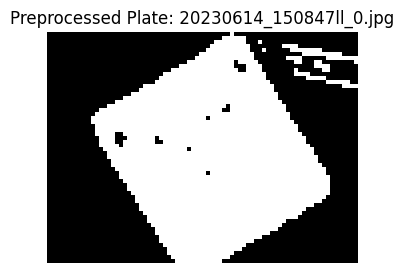

🔎 No text detected.
--------------------------------------------------
📸 plates/20230614_150847ll_1.jpg


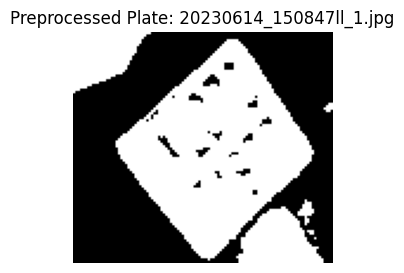

🔎 No text detected.
--------------------------------------------------
📸 plates/20230614_150847ll_2.jpg


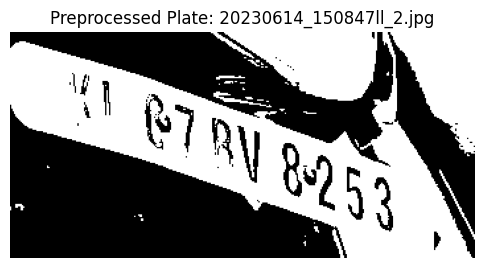

🔎 Text: 41 (Confidence: 0.67)
🔎 Text: 8v253 (Confidence: 0.89)
🔎 Text: 07 RV (Confidence: 0.55)
--------------------------------------------------
📸 plates/20230614_150932ll_0.jpg


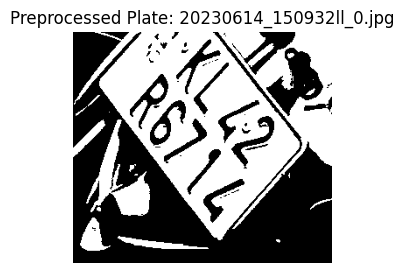

🔎 Text: R (Confidence: 0.08)
🔎 Text: 2 (Confidence: 0.86)
🔎 Text: ; (Confidence: 0.22)
--------------------------------------------------
📸 plates/20230614_150932ll_1.jpg


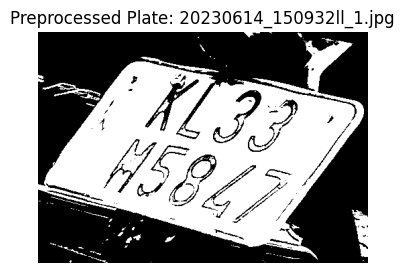

🔎 Text: K [ (Confidence: 0.25)
🔎 Text: 14 7 (Confidence: 0.20)
🔎 Text: 33 (Confidence: 1.00)
🔎 Text: N58 (Confidence: 0.14)
--------------------------------------------------
📸 plates/20230614_150952ll_0.jpg


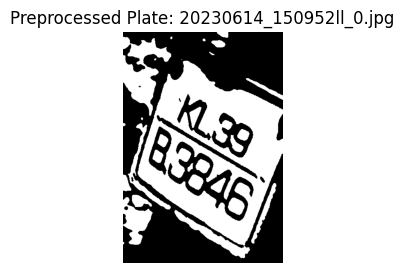

🔎 Text: K3 (Confidence: 0.25)
🔎 Text: 0386 (Confidence: 0.34)
--------------------------------------------------
📸 plates/20230614_151016ll_0.jpg


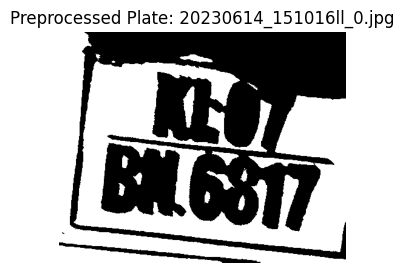

🔎 Text: E76377 (Confidence: 0.26)
--------------------------------------------------
📸 plates/20230614_151249ll_0.jpg


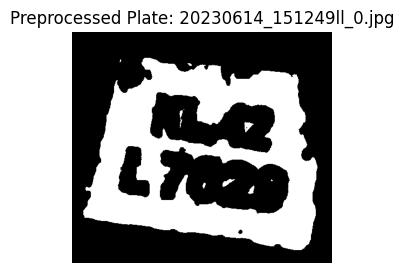

🔎 Text: 4583 (Confidence: 0.19)
--------------------------------------------------
📸 plates/20230620_155828ll_0.jpg


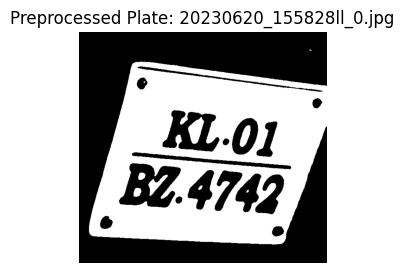

🔎 Text: KL.Ol (Confidence: 0.20)
🔎 Text: B2.474p (Confidence: 0.33)
--------------------------------------------------
📸 plates/20230620_160208ll_0.jpg


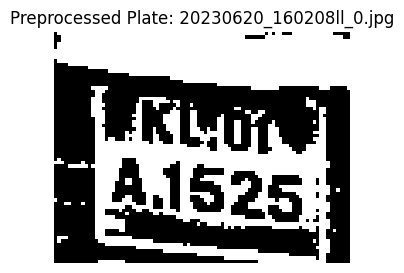

🔎 Text: Ukiui (Confidence: 0.07)
🔎 Text: [44l6253 (Confidence: 0.14)
--------------------------------------------------
📸 plates/20230620_160208ll_1.jpg


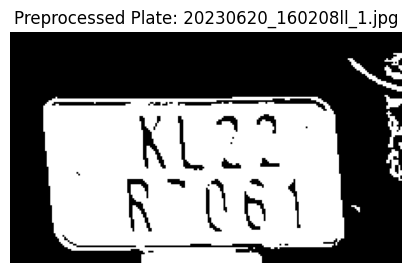

🔎 Text: KL? (Confidence: 0.94)
🔎 Text: R (Confidence: 1.00)
🔎 Text: (6 (Confidence: 0.30)
--------------------------------------------------
📸 plates/20230620_160208ll_2.jpg


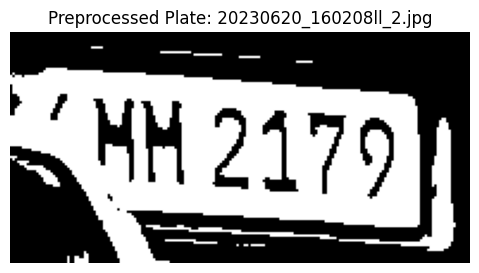

🔎 Text: 2179 (Confidence: 0.64)
--------------------------------------------------
📸 plates/20230620_161001ll_0.jpg


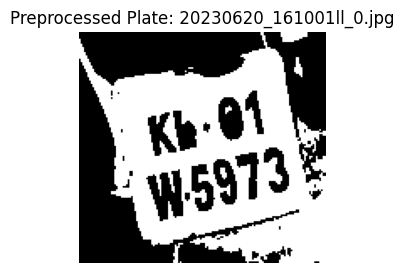

🔎 Text: Kh Q1 (Confidence: 0.08)
🔎 Text: W5973 (Confidence: 0.98)
--------------------------------------------------
📸 plates/20230620_161003ll_0.jpg


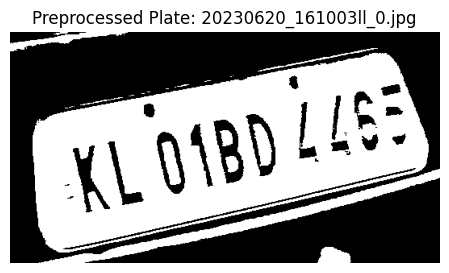

🔎 Text: Ll;: (Confidence: 0.39)
🔎 Text: KL oIBD (Confidence: 0.12)
--------------------------------------------------
📸 plates/20230620_161003ll_1.jpg


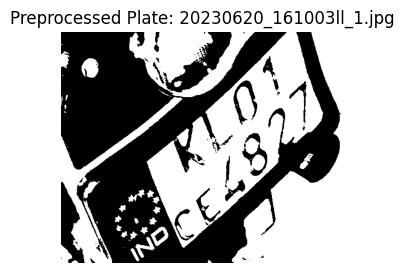

🔎 Text: J (Confidence: 0.09)
--------------------------------------------------
📸 plates/20230620_161019ll_0.jpg


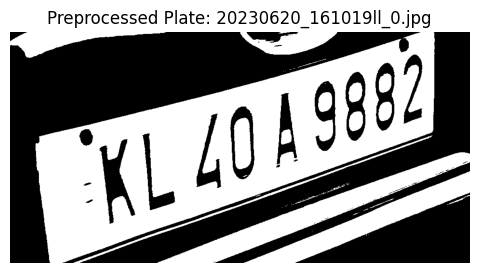

🔎 Text: 9882 (Confidence: 0.98)
🔎 Text: LOa= (Confidence: 0.34)
🔎 Text: KL (Confidence: 0.99)
--------------------------------------------------
📸 plates/20230620_161050ll_0.jpg


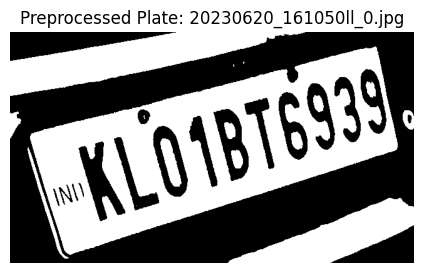

🔎 Text: iNI) (Confidence: 0.19)
🔎 Text: KLOIBT6939_ (Confidence: 0.51)
--------------------------------------------------
📸 plates/20230620_161050ll_1.jpg


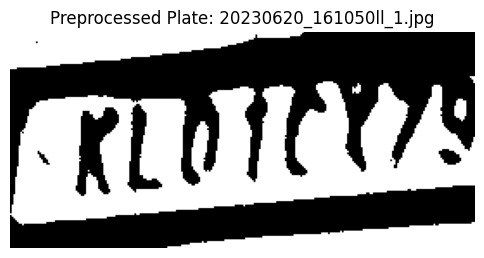

🔎 Text: RLoi) (Confidence: 0.05)
--------------------------------------------------
📸 plates/20230620_161150ll_0.jpg


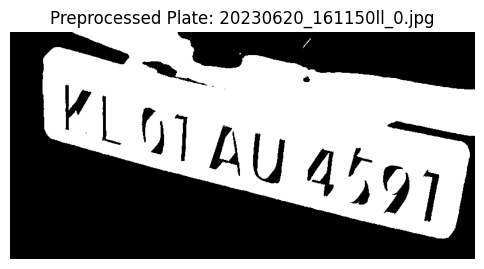

🔎 Text: VL (] (Confidence: 0.26)
🔎 Text: AU 45,91 (Confidence: 0.54)
--------------------------------------------------


In [ ]:
import easyocr
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

for crop_path in plate_crops:
    preprocessed_img = preprocess_plate(crop_path)
    result = reader.readtext(preprocessed_img)

    print(f"📸 {crop_path}")
    plt.figure(figsize=(6, 3))
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title(f"Preprocessed Plate: {os.path.basename(crop_path)}")
    plt.axis("off")
    plt.show()

    if result:
        for (bbox, text, conf) in result:
            print(f"🔎 Text: {text} (Confidence: {conf:.2f})")
    else:
        print("🔎 No text detected.")
    print("-"*50)

NOW,THE LAST STEP OF OUR PROJECT IS TO CREATE A STREAMLIT WEBAPPLICATION FOR OUR ANPR SYSTEM.

In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
import time
import tempfile
import os

st.set_page_config(page_title="Automatic Number Plate Recognition", page_icon="🚗", layout="wide")

st.sidebar.title("📄 Navigation")
page = st.sidebar.radio("Go to", ["ANPR System using YOLOV8", "About Project"])

@st.cache_resource
def load_model():
    try:
        model_path = "/content/runs/detect/plate_detector/weights/best.pt"
        return YOLO(model_path)
    except Exception as e:
        st.error(f"Model load failed: {e}")
        return None

@st.cache_resource
def load_ocr():
    try:
        return easyocr.Reader(['en'])
    except Exception as e:
        st.error(f"OCR init failed: {e}")
        return None

model = load_model()
reader = load_ocr()

if page == "ANPR System using YOLOV8":
    st.title("Automatic Number Plate Recognition (ANPR)")
    st.write("""
    Upload a vehicle image to detect and extract the license plate text
    using **YOLOv8** for detection and **EasyOCR** for text recognition.
    """)
    conf_threshold = st.slider("🎯 Detection Confidence", 0.2, 0.9, 0.4)
    def process_image(img):
        start = time.time()
        results = model.predict(source=img, conf=conf_threshold, save=False, verbose=False)
        end = time.time()

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        annotated = img_rgb.copy()
        texts = []

        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()
            for x1, y1, x2, y2 in boxes:
                x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
                cv2.rectangle(annotated, (x1, y1), (x2, y2), (255, 255, 0), 2)
                crop = img_rgb[y1:y2, x1:x2]
                gray = cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY)
                _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                ocr = reader.readtext(binary)
                if ocr:
                    text = " ".join([t[1] for t in ocr])
                    texts.append(text)
                    cv2.putText(annotated, text, (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        return annotated, texts, end - start

    uploaded = st.file_uploader("📂 Upload Vehicle Image", type=["jpg","jpeg","png"])
    if uploaded and model and reader:
        tfile = tempfile.NamedTemporaryFile(delete=False)
        tfile.write(uploaded.read())
        img = cv2.imread(tfile.name)

        with st.spinner("🔍 Detecting license plate..."):
            annotated_img, texts, duration = process_image(img)

        st.image(annotated_img, caption="Detection Result", use_column_width=True)
        if texts:
            st.success(f"✅ Detected Plates: {', '.join(texts)}")
        else:
            st.warning("❌ No plate text detected.")
        st.caption(f"⚡ Inference Time: {duration:.2f}s")
elif page == "About Project":
    st.title("ℹ️ About This Project")
    st.markdown("""
    ## 🚗 Automatic Number Plate Recognition (ANPR)
    This web application automatically detects and reads vehicle license plates
    using **Deep Learning** and **Optical Character Recognition (OCR)**.

    ### 🧩 Technologies Used
    - **YOLOv8**: For license plate detection
    - **EasyOCR**: For reading alphanumeric characters
    - **OpenCV & NumPy**: For image processing
    - **Streamlit**: For creating the user interface

    ### ⚙️ Workflow
    1. Upload a vehicle image
    2. The trained YOLOv8 model detects the plate region
    3. EasyOCR extracts and reads the text from the detected plate
    4. The output image and text are displayed instantly

    ### 👨‍💻 Creator
    **Name:** Karthik muruganathem
    **Role:** Data scientist
    **Contact:** [📧 Email me](mailto:karthikrx100tamil@gmail.com)
    **GitHub:** [github.com/yourgithub](https://github.com/Karmukilkar)

    ### 💡 Future Improvements
    - Real-time webcam detection
    - Multi-plate recognition for parking systems
    - Integration with a vehicle database for instant info retrieval

    ---
    _Built with ❤️ using Streamlit and Python._
    """)


Writing app.py


USEING NGROK : MY FIRST CHOICE WAS TO HOST THE WEB APPLICATION THROUGH LOCAL TUNNEL BUT IT WAS VERY SLOW AND NEVER DISLAYED THE WEB APPLICATION , SO I HAVE DECIDED TO HOST MY WEB APPLICATION THROUGH NGROK WHICH IS FASTER THEN LOCAL TUNNEL .

In [ ]:
!pip install pyngrok --quiet

In [ ]:
!ls

app.py	drive  plates  runs  yolo11n.pt  yolov8s.pt


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
import os
from google.colab import userdata
try:
  NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
except:
  print("NGROK_AUTH_TOKEN not found in Colab secrets.")
  print("Please add your ngrok authtoken to Colab secrets and try again.")
  NGROK_AUTH_TOKEN = "33F1f3bk62jPBgh0KcDnt429WgC_3fDXFhD98BfR3QGGcax4T"

if NGROK_AUTH_TOKEN:
  ngrok.set_auth_token(NGROK_AUTH_TOKEN)
  # Open a tunnel to the Streamlit app on port 8501
  public_url = ngrok.connect(addr="8501", proto="http")
  print(f"Streamlit app available at: {public_url}")
else:
  print("Cannot start ngrok tunnel without NGROK_AUTH_TOKEN.")

In [ ]:
#!rm -r /content/runs/detect/plate_detector_preprocessed